## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [ ]:
%pip install wbgapi

In [ ]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/drive/MyDrive/DATASCIENCE')

import my_func as fn

Mounted at /content/drive


In [ ]:
dir(fn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ceil',
 'descargar_en_chunks',
 'np',
 'pd',
 'wb']

In [ ]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [ ]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [ ]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [ ]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [ ]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


# ** Parto creando una copia para no modificar el dataset original. Así puedo comparar y volver atrás si algo sale mal.**

In [ ]:
df_wb_stage1 = df_wb_raw.copy()

In [ ]:
df_etapa1 = df_wb_raw.copy()

#  Esta tabla resume el “comportamiento típico” y la dispersión de las variables. Es la foto rápida para detectar escalas raras o valores extremos.

In [ ]:
tabla_descriptivos = (
    df_etapa1.describe().T[['mean', '50%', 'std', 'min', 'max']]
    .rename(columns={'50%': 'median'})
)
tabla_descriptivos

,mean,median,std,min,max
SP.POP.GROW,1.152752e+00,1.112108e+00,1.576210e+00,-8.423008,6.527050e+00
SP.POP.TOTL,3.999611e+07,7.335048e+06,1.484957e+08,9816.000000,1.438070e+09
SP.POP.TOTL.FE.IN,1.987776e+07,3.672054e+06,7.252840e+07,4795.000000,6.961863e+08
SP.POP.TOTL.FE.ZS,4.997349e+01,5.032928e+01,2.993389e+00,28.483741,5.492088e+01
SP.POP.TOTL.MA.IN,2.011836e+07,3.560820e+06,7.598056e+07,5021.000000,7.418833e+08
...,...,...,...,...,...
EG.CFT.ACCS.RU.ZS,6.227115e+01,8.415000e+01,4.132452e+01,0.000000,1.000000e+02
EG.CFT.ACCS.UR.ZS,7.850110e+01,9.760000e+01,3.239499e+01,0.100000,1.000000e+02
IT.NET.USER.FE.ZS,8.719026e+01,8.982900e+01,1.377467e+01,16.697100,1.000000e+02
IT.NET.USER.MA.ZS,8.824051e+01,9.053830e+01,1.254217e+01,19.497300,1.000000e+02


# Los NA son clave porque pueden sesgar resultados. Primero mido el % de NA por variable para decidir qué imputo y qué elimino según la regla del enunciado.

In [ ]:
porc_na = (df_etapa1.isna().mean() * 100).sort_values(ascending=False)
porc_na

,0
SE.PRM.NENR.FE,100.000000
SE.PRM.NENR.MA,100.000000
SE.PRM.NENR,100.000000
GC.TAX.EXPT.ZS,83.333333
GC.TAX.EXPT.CN,83.333333
...,...
SP.POP.TOTL.MA.IN,0.000000
SP.POP.TOTL.FE.ZS,0.000000
SP.DYN.LE00.MA.IN,0.000000
SP.DYN.LE00.FE.IN,0.000000


# Si una variable tiene pocos NA, imputar es razonable para no perder información. Si tiene demasiados NA, la variable pierde confiabilidad y conviene eliminarla.

In [ ]:
variables_eliminar = porc_na[porc_na > 15].index.tolist()
variables_imputar = porc_na[(porc_na > 0) & (porc_na <= 15)].index.tolist()

print("Variables a eliminar (>15% NA):")
print(variables_eliminar)

print("\nVariables a imputar (≤15% NA):")
print(variables_imputar)


Variables a eliminar (>15% NA):
['SE.PRM.NENR.FE', 'SE.PRM.NENR.MA', 'SE.PRM.NENR', 'GC.TAX.EXPT.ZS', 'GC.TAX.EXPT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'IT.NET.USER.FE.ZS', 'IT.NET.USER.MA.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SE.TER.ENRR.MA', 'SE.TER.ENRR.FE', 'SE.TER.ENRR', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.FE', 'SE.SEC.ENRR', 'NE.EXP.GNFS.KD.ZG', 'NE.CON.GOVT.KN', 'NE.EXP.GNFS.KN', 'NE.CON.PRVT.CN', 'NE.CON.PRVT.CD', 'NE.CON.GOVT.ZS']

Variables a imputar (≤15% NA):
['NE.EXP.GNFS.ZS', 'SL.TLF.TOTL.IN', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.ZS', 'SL.TLF.TOTL.FE.ZS', 'FP.CPI.TOTL.ZG', 'IT.NET.USER.ZS', 'NV.IND.MANF.CN', 'NV.IND.MANF.CD', 'EG.CFT.ACCS.UR.ZS', 'EG.CFT.ACCS.ZS', 'EG.CFT.ACCS.RU.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CN', 'NV.SRV.TOTL.CD', 'SP.RUR.TOTL.ZG', 'EN.GHG.CO2.IP.MT.CE.AR5', 'GE.EST', 'BX.KLT.DINV.WD.GD.ZS', 'BM.KLT.D

# Elimino variables con demasiados faltantes porque imputarlas sería “inventar” demasiado y podría contaminar el análisis posterior.

In [ ]:
df_etapa1 = df_etapa1.drop(columns=variables_eliminar)

# Uso mediana porque es robusta a outliers (común en datos macro). Así mantengo la distribución más estable que con la media.


In [ ]:
for col in variables_imputar:
    if col in df_etapa1.columns:
        df_etapa1[col] = df_etapa1[col].fillna(df_etapa1[col].median())

#  Confirmo que la limpieza se aplicó correctamente. Idealmente debería quedar en 0 o muy poco (por ejemplo, si hubiese alguna columna no numérica rara).

In [ ]:
na_restantes = df_etapa1.isna().sum().sort_values(ascending=False)
na_restantes.head(20)

,0
country,0
Country,0
NY.GDP.MKTP.PP.KD,0
SP.POP.GROW,0
SP.POP.TOTL,0
SP.POP.TOTL.FE.IN,0
SP.POP.TOTL.FE.ZS,0
SP.POP.TOTL.MA.IN,0
SP.POP.TOTL.MA.ZS,0
SP.URB.GROW,0


#Como el PIB es la variable objetivo, necesito ver su distribución. Normalmente es asimétrica (pocos países muy grandes), y eso también explica por qué aparecen outliers.

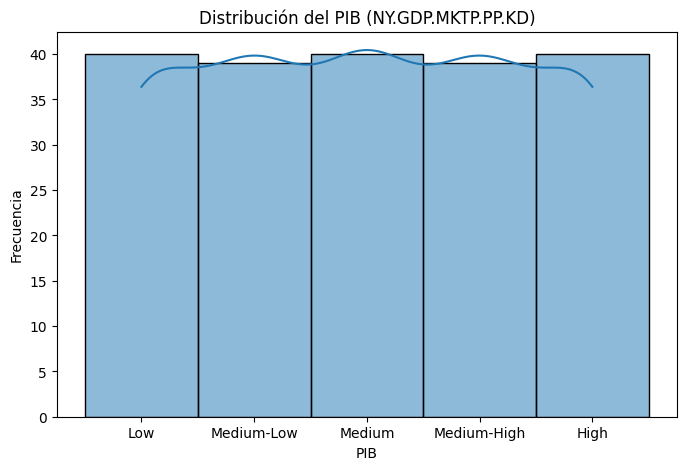

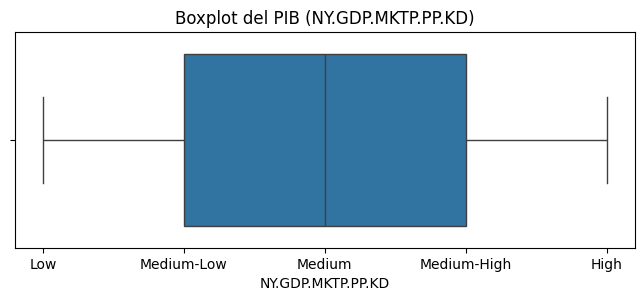

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_etapa1['NY.GDP.MKTP.PP.KD'], bins=30, kde=True)
plt.title("Distribución del PIB (NY.GDP.MKTP.PP.KD)")
plt.xlabel("PIB")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,2.8))
sns.boxplot(x=df_etapa1['NY.GDP.MKTP.PP.KD'])
plt.title("Boxplot del PIB (NY.GDP.MKTP.PP.KD)")
plt.show()

# El mapa permite ver rápidamente patrones espaciales (regiones más ricas / más pobres). Es una visualización natural para variables a nivel país.

In [ ]:
import plotly.express as px

mapa_pib = px.choropleth(
    df_etapa1,
    locations="country",              # ISO3
    color="NY.GDP.MKTP.PP.KD",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Distribución del PIB por país (NY.GDP.MKTP.PP.KD)"
)
mapa_pib.show()


# El enunciado pide transformar el PIB continuo en 5 grupos comparables. qcut crea quintiles: cada categoría queda con cantidad similar de países, útil para clasificación.


In [ ]:
col_pib = 'NY.GDP.MKTP.PP.KD'

print("Existe columna PIB:", col_pib in df_etapa1.columns)
print("dtype PIB:", df_etapa1[col_pib].dtype)
print("NA PIB:", df_etapa1[col_pib].isna().sum())
print("Unique PIB:", df_etapa1[col_pib].nunique())
df_etapa1[col_pib].head(5)

Existe columna PIB: True
dtype PIB: category
NA PIB: 0
Unique PIB: 5


,NY.GDP.MKTP.PP.KD
0,Medium
1,Medium
2,Medium-Low
3,High
4,Low


# Al intentar discretizar el PIB con pd.qcut() apareció un error porque la columna NY.GDP.MKTP.PP.KD ya no estaba en formato numérico, sino en formato categórico (dtype: category). Esto ocurrió porque en una ejecución anterior se había aplicado qcut sobrescribiendo la columna original del PIB, transformándola desde un valor continuo (float) a etiquetas como Low, Medium, High.



#Como el objetivo de la etapa 1 es analizar la distribución del PIB en su forma continua (histograma/boxplot y mapa) y además crear una versión discretizada para clasificación, fue necesario recuperar el PIB numérico. Para ello se volvió a construir el dataset (df_wb_raw) desde la descarga original (dejando el PIB como float64), y luego se creó una columna nueva PIB_categoria con qcut, evitando modificar la variable continua.



#De esta forma se mantiene:

#el PIB continuo para los gráficos descriptivos (histograma, boxplot, mapa), y

#el PIB discretizado en 5 grupos para usarlo como variable objetivo en etapas posteriores.

In [ ]:
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [ ]:
df_wb_raw['NY.GDP.MKTP.PP.KD'].dtype

dtype('float64')

In [ ]:
df_etapa1 = df_wb_raw.copy()

In [ ]:
df_etapa1['PIB_categoria'] = pd.qcut(
    df_etapa1['NY.GDP.MKTP.PP.KD'],
    q=5,
    labels=['Bajo', 'Medio-Bajo', 'Medio', 'Medio-Alto', 'Alto']
)
df_etapa1['PIB_categoria'].value_counts()

,count
PIB_categoria,
Bajo,50
Medio-Bajo,49
Medio,49
Medio-Alto,49
Alto,49


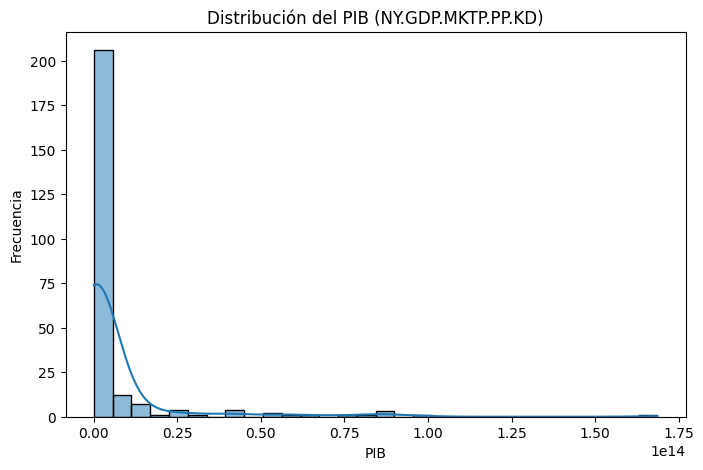

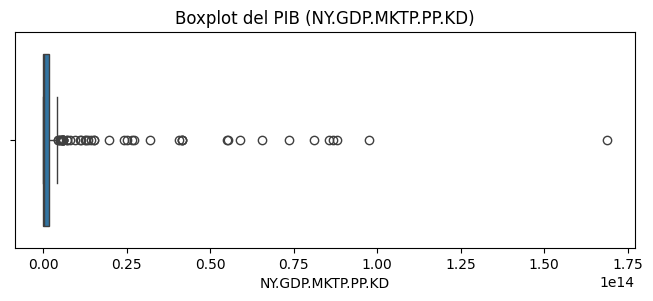

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_etapa1['NY.GDP.MKTP.PP.KD'], bins=30, kde=True)
plt.title("Distribución del PIB (NY.GDP.MKTP.PP.KD)")
plt.xlabel("PIB")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,2.8))
sns.boxplot(x=df_etapa1['NY.GDP.MKTP.PP.KD'])
plt.title("Boxplot del PIB (NY.GDP.MKTP.PP.KD)")
plt.show()

In [ ]:
import plotly.express as px

fig = px.choropleth(
df_etapa1,
locations="country",
color="NY.GDP.MKTP.PP.KD",
hover_name="Country",
color_continuous_scale="Viridis",
title="Distribución del PIB por país"
)
fig.show()

# *ETAPA 2*


#trabajamos sobre una copia para no modificar el resultado consolidado de la etapa 1.

In [ ]:
df_etapa2 = df_etapa1.copy()
print(df_etapa2.shape)

(246, 68)


#PCA solo funciona con variables numéricas y no se debe incluir la variable objetivo ni identificadores.

In [ ]:
objetivo = "PIB_categoria"

# Columnas típicas a excluir (si existen)
columnas_excluir = [objetivo, "country", "Country", "año", "year"]

# Seleccionamos solo variables numéricas para PCA
columnas_numericas = df_etapa2.select_dtypes(include=["number"]).columns.tolist()
columnas_X = [c for c in columnas_numericas if c not in columnas_excluir]

X = df_etapa2[columnas_X].copy()
y = df_etapa2[objetivo].copy()

print("Variables numéricas usadas en PCA:", len(columnas_X))
print("Shape X:", X.shape, "| Shape y:", y.shape)


Variables numéricas usadas en PCA: 65
Shape X: (246, 65) | Shape y: (246,)


#variables con NA muy altos (ej. 60–100%) no se imputan bien y pueden distorsionar el PCA, por eso se eliminan.

In [ ]:
# % de NA por variable
na_porcentaje = X.isna().mean().sort_values(ascending=False) * 100
display(na_porcentaje.head(10))

# Regla práctica: si una variable tiene demasiados NA, imputarla no aporta info
umbral_na = 50  # 50% (puedes dejarlo en 50 para ser conservador)
columnas_validas = na_porcentaje[na_porcentaje < umbral_na].index.tolist()

X = X[columnas_validas].copy()

print("Variables después de eliminar NA altos:", X.shape[1])
print("NA totales antes de imputar:", int(X.isna().sum().sum()))

,0
SE.PRM.NENR,100.000000
SE.PRM.NENR.FE,100.000000
SE.PRM.NENR.MA,100.000000
GC.TAX.EXPT.ZS,86.585366
GC.TAX.EXPT.CN,86.585366
GC.DOD.TOTL.CN,86.178862
GC.DOD.TOTL.GD.ZS,84.146341
IT.NET.USER.FE.ZS,63.414634
IT.NET.USER.MA.ZS,63.414634
EG.USE.ELEC.KH.PC,62.601626


Variables después de eliminar NA altos: 51
NA totales antes de imputar: 1516


#PCA no admite valores faltantes; imputar con mediana es una solución estándar y robusta.

In [ ]:
# La mediana es robusta ante outliers y deja el dataset listo para PCA
X = X.fillna(X.median(numeric_only=True))

print("NA después de imputar:", int(X.isna().sum().sum()))

NA después de imputar: 0


# las variables están en escalas distintas; estandarizar evita que una variable domine el PCA solo por su magnitud.

In [ ]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

print("Shape X_escalado:", X_escalado.shape)

Shape X_escalado: (246, 51)


#medimos cuánta información captura cada componente para decidir cuántos necesitamos.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

pca = PCA()
pca.fit(X_escalado)

varianza = pca.explained_variance_ratio_
varianza_acum = np.cumsum(varianza)

tabla_varianza = pd.DataFrame({
    "Componente": np.arange(1, len(varianza)+1),
    "Varianza_explicada": varianza,
    "Varianza_acumulada": varianza_acum
})

display(tabla_varianza.head(15))

,Componente,Varianza_explicada,Varianza_acumulada
0,1,0.243578,0.243578
1,2,0.209485,0.453063
2,3,0.138251,0.591314
3,4,0.065543,0.656857
4,5,0.058950,0.715807
5,6,0.045134,0.760941
6,7,0.031447,0.792388
7,8,0.027533,0.819921
8,9,0.023410,0.843331
9,10,0.021851,0.865182


# seleccionamos el mínimo número de componentes que explica una proporción alta (rango recomendado 70–90%) de la varianza total.

In [ ]:
umbral_varianza = 0.80
n_componentes = int(np.argmax(varianza_acum >= umbral_varianza) + 1)

print(f"N° componentes para explicar ≥ {umbral_varianza*100:.0f}%:", n_componentes)
print("Varianza acumulada lograda:", float(varianza_acum[n_componentes-1]))

N° componentes para explicar ≥ 80%: 8
Varianza acumulada lograda: 0.8199213654352958


# los gráficos permiten justificar visualmente la elección de n_componentes

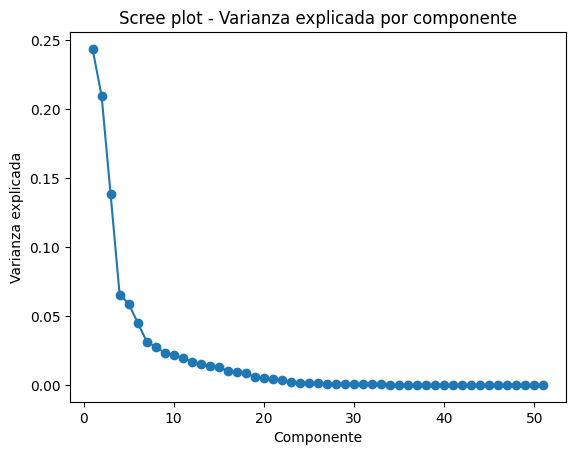

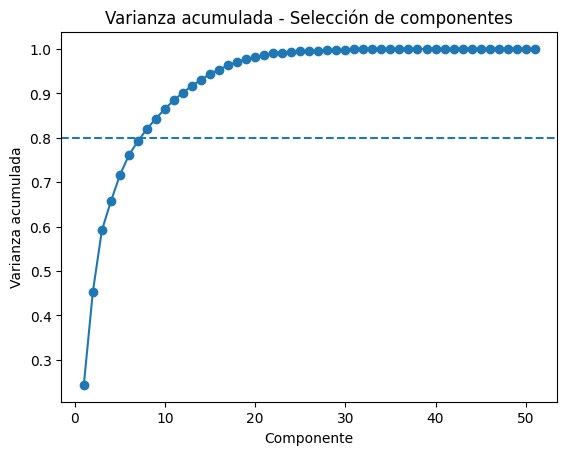

In [ ]:
import matplotlib.pyplot as plt

# Scree plot
plt.figure()
plt.plot(np.arange(1, len(varianza)+1), varianza, marker="o")
plt.xlabel("Componente")
plt.ylabel("Varianza explicada")
plt.title("Scree plot - Varianza explicada por componente")
plt.show()

# Varianza acumulada
plt.figure()
plt.plot(np.arange(1, len(varianza_acum)+1), varianza_acum, marker="o")
plt.axhline(umbral_varianza, linestyle="--")
plt.xlabel("Componente")
plt.ylabel("Varianza acumulada")
plt.title("Varianza acumulada - Selección de componentes")
plt.show()

 #creamos un dataset compacto con las componentes principales y la variable objetivo, que será el insumo directo para los modelos de clasificación de la Etapa 3.



In [ ]:
pca_final = PCA(n_components=n_componentes)
X_pca = pca_final.fit_transform(X_escalado)

nombres_cp = [f"CP{i}" for i in range(1, n_componentes+1)]
df_componentes = pd.DataFrame(X_pca, columns=nombres_cp)

# Mantener identificadores si están
cols_id = [c for c in ["country", "Country"] if c in df_etapa2.columns]

df_etapa2_pca = pd.concat([
    df_etapa2[cols_id].reset_index(drop=True),
    df_componentes.reset_index(drop=True),
    y.reset_index(drop=True)
], axis=1)

display(df_etapa2_pca.head())
print("Shape df_etapa2_pca:", df_etapa2_pca.shape)

,country,Country,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,PIB_categoria
0,ZWE,Zimbabwe,-1.132366,-3.376459,-0.219514,-2.084486,-0.785659,1.339317,0.853973,0.305791,Medio
1,ZMB,Zambia,-1.186514,-3.595760,-0.234911,-0.122050,-1.277590,2.076674,1.097303,0.605218,Medio-Bajo
2,PSE,West Bank and Gaza,-1.109254,-0.673833,-0.181964,0.092935,0.195917,0.068087,0.361735,-0.892203,Medio-Bajo
3,VNM,Viet Nam,-0.878465,0.426843,3.466417,0.523990,-1.614273,-1.871345,-0.483754,2.190205,Medio-Alto
4,VUT,Vanuatu,-1.313463,-1.348432,-0.386861,-0.435007,-1.521369,1.356420,3.580123,2.066635,Bajo


Shape df_etapa2_pca: (246, 11)
